## Classification

- Logistic Regression recap
- KNN Classifier
- Decision Tree Classifier
- Bias and variance
- Random Forest Classifier
- Support Vector Machines
- Naive Bayes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# import data preprocessing functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import various metrics for model scoring
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss


import warnings
warnings.filterwarnings('ignore')

## 1. Logistic regression recap

Let's recall the insurance dataset from last week: Lpredict whether a policy holder will make a major claim. 
- Import insurance2 dataset (originally from kaggle.com):

In [2]:
df = pd.read_csv("https://github.com/wsko/data_science_academy/raw/main/data/insurance2.csv")
df.head()
## insuranceclaim is a categorical label >> Classification

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


- Feature engineering: perform necessary data transformation

In [4]:
### region is an integer but should be treated as a categorical variable one-hot encoded
df['region'] = df['region'].astype('str')
df['sex'] = df['sex'].astype('str')
df['smoker'] = df['smoker'].astype('str')

### use pd.get_dummies to encode all categorical variables (note they still can be "str" typed)
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,insuranceclaim,sex_1,smoker_1,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1,0,1,0,0,1
1,18,33.770,1,1725.55230,1,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,1,0,1,0,0


In [5]:
### create numpy arrays X and y
label = 'insuranceclaim'
features = list(df.columns)
features.remove(label)
X = df[features].to_numpy()
y = df[label].to_numpy()
print(X.shape, y.shape)

(1338, 9) (1338,)


In [6]:
## name label classes
label_classes = ['Not_filed', 'Filed']

In [7]:
### split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### perform min-max scaling using a sklearn function MinMaxScaler() - use fit and transform methods
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- Train and test a Logistic regression model

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logisgic Regression, \n \n")
print(classification_report(y_test, lr.predict(X_test), target_names = label_classes)[:220])
print("confusion matrix:\n", confusion_matrix(y_test, lr.predict(X_test)))

Logisgic Regression, 
 

              precision    recall  f1-score   support

   Not_filed       0.83      0.84      0.83       161
       Filed       0.89      0.88      0.89       241

    accuracy                           0.87       402
  
confusion matrix:
 [[135  26]
 [ 28 213]]


- Model interpretation

In [9]:
## model parameters (coefficients)
##
pd.Series(lr.coef_[0], index = features)
## feature importance order: bmi, children, smoker, age, etc. .....

age         1.005291
bmi         5.982402
children   -4.934425
charges     0.767279
sex_1       0.052221
smoker_1    2.830037
region_1   -0.381897
region_2   -0.136031
region_3   -0.274483
dtype: float64

#### Logistic Regression Summary

- model type: generalized linear, parametric
- model expression: sigmoid funcion of a linear mathematical expression evaluated w.r.t. a threshold
- assumptions: classes are linearly separable
- python implementation: sklearn.linear_model.LogisticRegression
- hyperparameters: regularization parameters (we will discuss regularization later)
- interpretability: high
- scalability: high


https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222

### 2. K nearest neighbours (KNN)


- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html


- To predict on new data X_new, find N nearest neighbours (using a distance metric such as "euclidean" or "manhattan") in the training data set. Vote on the majority class. Optionally, compute the probability (percentage of votes) for each class.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()#n_neighbors = 18, metric = 'euclidean') # 
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test), target_names = ['Not filed', 'Filed'])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

   Not filed       0.78      0.76      0.77       161
       Filed       0.84      0.86      0.85       241

    accuracy                           0.82       402
  
confusion matrix:
 [[122  39]
 [ 34 207]]


#### KNN and Overfit

- What hyperparameters does KNN have?
- What makes KNN overfit?


    
<img src="https://github.com/wsko/data_science_academy/blob/main/images/KNN.png?raw=true" alt="KNN" width="600" height="600">



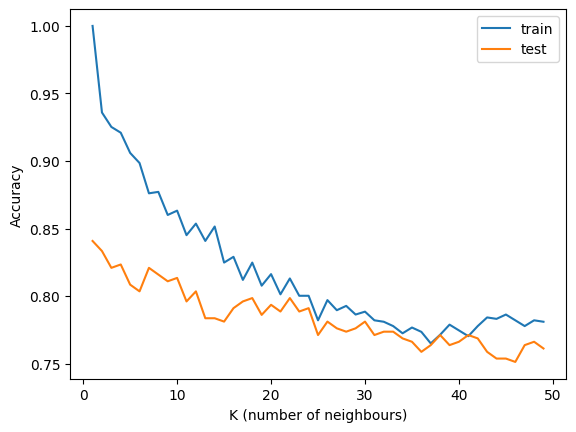

In [11]:
acc_tr = []
acc_te = []
nn_max = 50

for i in range(1,nn_max):
    clf = KNeighborsClassifier(n_neighbors = i, p = 1)#, algorithm = 'brute', metric = 'euclidean')
    clf.fit(X_train, y_train)
    acc_tr.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_te.append(accuracy_score(y_test, clf.predict(X_test)))
    

sns.lineplot(y = acc_tr, x = range(1,nn_max), label = 'train')
sns.lineplot(y = acc_te, x = range(1,nn_max), label = 'test')
plt.xlabel("K (number of neighbours)")
plt.ylabel("Accuracy")
plt.show()

#### KNN Classifier Summary

- model type: non-parametric
- assumptions: none
- python implementation: sklearn.neighbors.KNeighborsClassifier
- hyperparameters: k (number of neighbours), distance type
- interpretability: low
- scalability: low (can be improved with "non-brute" distance algorithms)

## Your Turn! 
### Lab 6 Part 1: When KNN Outperforms Logistic Regression

### 3. Decision Tree


- Perform a series of 1-dimensional splits
- Each split leads to the best separation between the classes (maximum information gain)
- The tree is a series of if-then instructions

In [12]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(max_depth = 3) ## explore the hyperparameters
dtc.fit(X_train, y_train)
print(classification_report(y_test, dtc.predict(X_test), target_names = ['Not filed', 'Filed'])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

   Not filed       0.74      0.99      0.85       161
       Filed       0.99      0.76      0.86       241

    accuracy                           0.86       402
  
confusion matrix:
 [[160   1]
 [ 57 184]]


In [13]:
pd.Series(X_test[4,:], index = features)

age         0.021739
bmi         0.429379
children    0.000000
charges     0.530794
sex_1       1.000000
smoker_1    1.000000
region_1    1.000000
region_2    0.000000
region_3    0.000000
dtype: float64

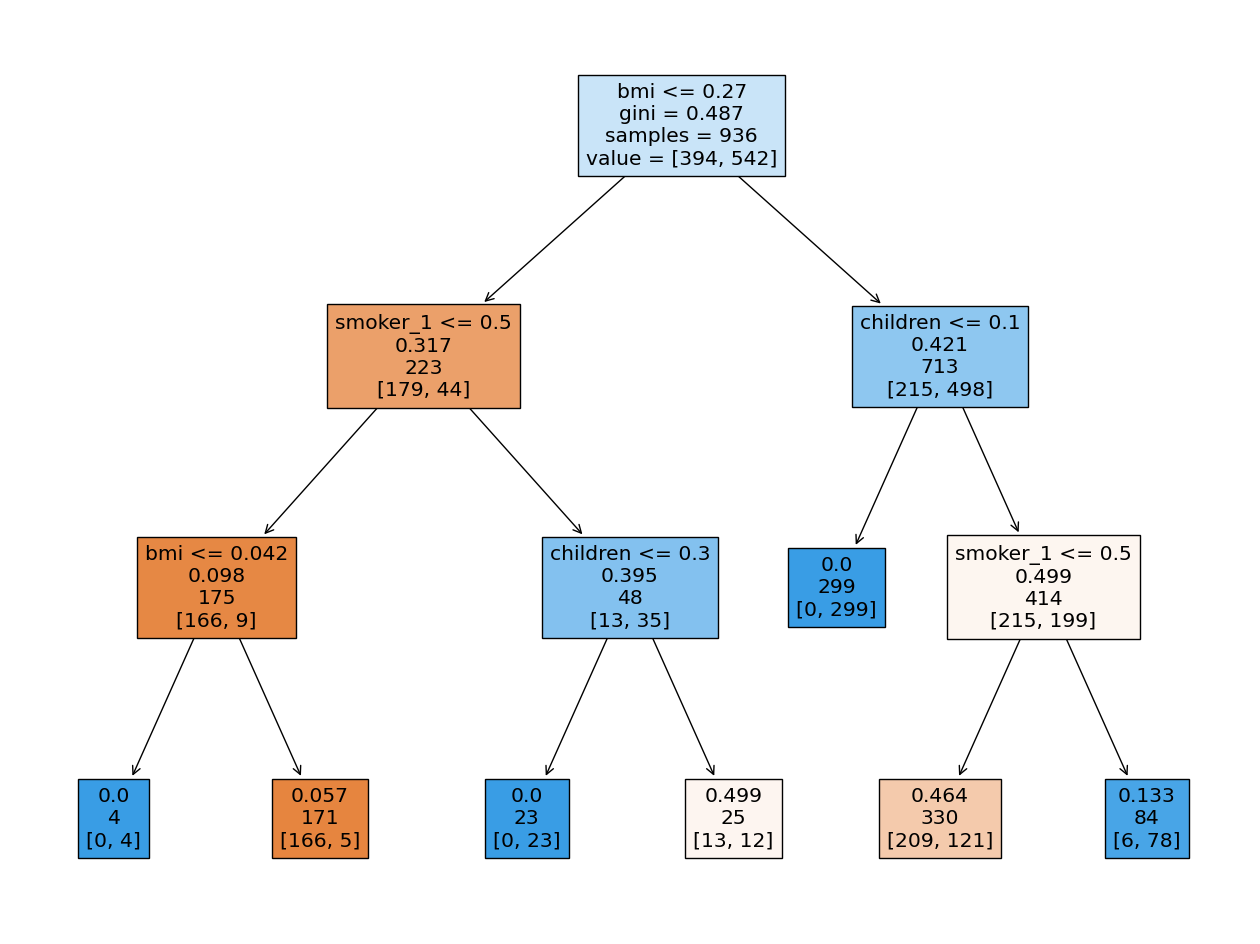

In [14]:
plt.figure(figsize=(16, 12))
tree.plot_tree(dtc, feature_names = features, label = 'root', filled = True, class_names=None)#['Not Filed', 'Filed']);
plt.show()
## press shift-o to disable scrollable outputs

#### Decision Tree Model: Decision Boundary

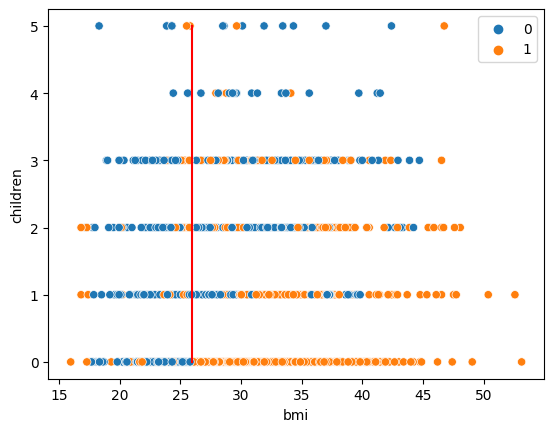

In [15]:
sns.scatterplot(x = 'bmi', y = 'children', data = df, hue = 'insuranceclaim')
# First split on BMI:
sns.lineplot(x = [25.983, 25.983], y = [0, 5], estimator = None, color = 'red')
# next split on children
#sns.lineplot(x = [25.983, 55], y = [0.5, 0.5], estimator = None, color = 'red')
# next split on smoker - we do not have this dimension on our plot :)
# next split on BMI
#sns.lineplot(x = [17.575, 17.575], y = [0, 5], estimator = None, color = 'red')
# next split on children
#sns.lineplot(x = [25.983, 55], y = [1.5, 1.5], estimator = None, color = 'red')
plt.show()

- Model interpretation

Use feature_importances_() method

In [16]:
pd.Series(dtc.feature_importances_, index = features)

age         0.000000
bmi         0.343685
children    0.371240
charges     0.000000
sex_1       0.000000
smoker_1    0.285076
region_1    0.000000
region_2    0.000000
region_3    0.000000
dtype: float64

#### Decision Tree Classifier Summary

- model type: non-parametric
- model expression: a set of rules or directed acyclical __graph__
- assumptions: none
- python implementation: sklearn.tree.DecisionTreeClassifier
- hyperparameters:  max_depth, min_samples_split, min_samples_leaf, min_impurity_decrease (_note: most hyperparameters focus on tree pruning, i.e., reducing the number of splits. Still, decision tree is one of the most inherently overfitting algorithms_)
- interpretability: excellent
- scalability: high

## 4. Bias and Variance

- How does our model respond to resampling:
    - Take a few randomizzed subsamples of the training dataset and train a model on each subsample
- high-variance models are prone to overfitting
- high-bias models are prone to underfitting

#### - Decision tree models typically have high variance. Solution:

## 5. Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
print(classification_report(y_test, rfc.predict(X_test), target_names = ['Not filed', 'Filed'])[:220])
pd.DataFrame(confusion_matrix(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

   Not filed       0.90      0.92      0.91       161
       Filed       0.95      0.93      0.94       241

    accuracy                           0.93       402
  


,0,1
0,148,13
1,17,224


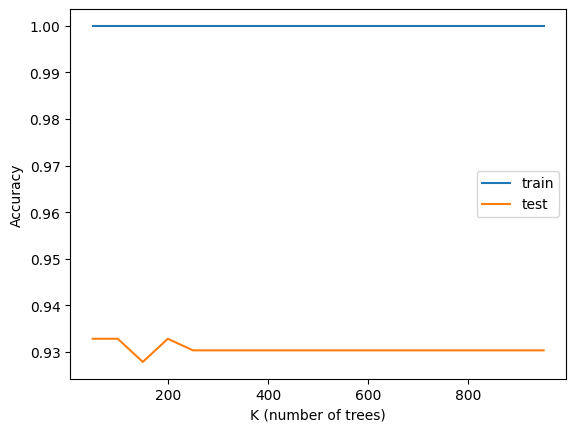

In [18]:
## Most significant hyperparameter: n_estimators (number of trees in the forest)

acc_tr = []
acc_te = []
nest_max = 1000

for i in range(50, nest_max, 50):
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=42)
    rfc.fit(X_train, y_train)
    acc_tr.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_te.append(accuracy_score(y_test, rfc.predict(X_test)))
 
sns.lineplot(y = acc_tr, x = range(50, nest_max, 50), label = 'train')
sns.lineplot(y = acc_te, x = range(50, nest_max, 50), label = 'test')
plt.xlabel("K (number of trees)")
plt.ylabel("Accuracy")
plt.show()

## Your Turn!
### Lab 6 Part 2: Classification


### Note: review parts 6 and 7 post-class if we run out of time


## 6. Support Vector Machines

https://medium.com/swlh/quick-tutorial-on-support-vector-machines-c1b06df68ac6


https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear') ## SVM kernel trick for non-linear decision boundaries
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test), target_names = ['Not filed', 'Filed'])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

   Not filed       0.83      0.87      0.85       161
       Filed       0.91      0.88      0.90       241

    accuracy                           0.88       402
  
confusion matrix:
 [[140  21]
 [ 28 213]]


In [20]:
svc.coef_

array([[ 0.77893959,  6.36392198, -4.8093757 ,  0.34842392,  0.14062397,
         2.57908868, -0.38158524, -0.30970279, -0.30732515]])

#### SVM Classifier Summary

- model type: linear, parametric
- model expression: linear decision boundary computed for maximum "margin"
- assumptions: classes are linearly separable. For a non-linear decision boundary SVM uses the so called "kernel trick" (adding more dimensions) which is even more computationally expensive and not scalable
- python implementation: sklearn.svm.SVC
- hyperparameters: regularization parameter (we will discuss regularization later)
- interpretability: low
- scalability: low

## 7. Naive Bayes

Naive Bayes is a classification technique based on Bayes’ Theorem: 


$$\mathbf{P} \left({c \mid x} \right) = \frac{\mathbf{P} \left ({x \mid c} \right) \mathbf{P} \left({c} \right)}{\mathbf{P} \left( {x} \right)}$$

The _naive_ assumption of Naive Bayes is that the features are probabilistically independent of each other, i.e., the presence of a particular feature in a class is unrelated to the presence of any other feature in predicting the label. For predicting on multiple features $x_1, x_2, ..., x_N$:
$$P(x_1|c)\times{P(x_2|c)}\times{}...\times{P(x_N|c)}$$

Bayes theorem computes posterior probability P(c|x) - (i.e., Probability of **c** given **x**)*,  from known probabilities P(c), P(x) and P(x|c) which can be computed directly from training set frequency tables

* P(c) is the __prior__, i.e., probability of class **c**
* P(x) is the __evidence__, i.e., probability of feature **x**
* P(x|c) is the __likelihood__, i.e., conditional probability of class (c) given feature (x)
* c is the __class__, i.e., one of the categories of the label. For binary labels _c_ can have one of two possible values
* P(c|x) is the __posterior__. The model computes posterior for each class for a given value of _x_ and then chooses the highest-probability class. 


#### To compute binary class prediction, find the class with max probability:


$$\mathbf{P} \left(0 \right) = \mathbf{P} \left ({x \mid 0} \right) \mathbf{P} \left({0} \right)$$
$$\mathbf{P} \left(1 \right) = \mathbf{P} \left ({x \mid 1} \right) \mathbf{P} \left({1} \right)$$

#### Feature considerations for Categorical Naive Bayes:

- Categorical features only (thus, limited applicability)
- Do not use one-hot encoding. Use ordinal encoding instead ("blue" = 0, "red" = 1, "yellow" = 2)
- Scaling is not required

Gaussian NB can handle numerical features but it is not a good algorithm 

In [21]:
df = pd.read_csv("https://github.com/wsko/data_science_academy/raw/main/data/insurance2.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


#### important: convert numerical features into categorical via binning

In [22]:
## NB is frequency based so we don't need one-hot encoding!
## Scaling is not required because all features are categorical

df['age'] = pd.cut(df['age'], bins = 4, labels = [0, 1, 2, 3])
df['bmi'] = pd.cut(df['bmi'], bins = [df['bmi'].min(), df['bmi'].median(), df['bmi'].max()], labels = [0, 1])
df['charges'] = pd.cut(df['charges'], bins = [df['charges'].min(), df['charges'].median(), df['charges'].max()], labels = [0, 1])
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0,0,0,0,1,3,1,1
1,0,1,1,1,0,2,0,1
2,0,1,1,3,0,2,0,0
3,1,1,0,0,0,1,1,0
4,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1333,2,1,1,3,0,1,1,0
1334,0,0,1,0,0,0,0,1
1335,0,0,1,0,0,2,0,1
1336,0,0,0,0,0,3,0,0


In [23]:
### create numpy arrays X and y
label = 'insuranceclaim'
features = list(df.columns)
features.remove(label)
X = df[features].to_numpy()
y = df[label].to_numpy()
print(X.shape, y.shape)

(1338, 7) (1338,)


In [24]:
### split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [25]:
from sklearn.naive_bayes import CategoricalNB
nbc = CategoricalNB()
nbc.fit(X_train, y_train)
print(classification_report(y_test, nbc.predict(X_test), target_names = ['Not filed', 'Filed'])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, nbc.predict(X_test)))

              precision    recall  f1-score   support

   Not filed       0.66      0.70      0.68       161
       Filed       0.79      0.76      0.78       241

    accuracy                           0.74       402
  
confusion matrix:
 [[113  48]
 [ 58 183]]


#### Naive Bayes Summary

- model type: probabilistic, Bayesian, generative
- model expression: frequencies and likelihoods
- assumptions: no interaction among the features
- python implementation: sklearn.naive_bayes.CategoricalNB
- hyperparameters: none, this is a purely probabilistics algorithm, prone to overfit
- interpretability: high
- scalability: hery high since frequency computation is very simple